### Improting neccesary libraries :-

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

### Reading Data from CSV file :-

In [2]:
data=pd.read_csv('happiness.csv')
data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


### Observations by looking available data :-

1. Available data has 12 columns (11 feature coulmns & 1 target column).

### Checking the no. of rows and columns available :-

In [3]:
data.shape

(158, 12)

### Checking total no. of null values in each column :-


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

### Dropping the unnecessary columns:-

Name of country, Region,Happiness Rank are not that useful. Also Standard Error and Dystopia Residual will not contribute in prediction.

In [5]:
data=data.drop(['Country','Region','Happiness Rank','Standard Error','Dystopia Residual'],axis=1)
data.head()

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


In [6]:
data.describe()

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,5.375734,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296
std,1.145010,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685
min,2.839000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.526000,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553
50%,5.232500,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130
75%,6.243750,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883
max,7.587000,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880


In [7]:
data.isna().sum()

Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
dtype: int64

### Observation :-

There is no null value present in dataset

### Counting no.of zeroes:

In [8]:
(data == 0).sum(axis=0)

Happiness Score                  0
Economy (GDP per Capita)         1
Family                           1
Health (Life Expectancy)         1
Freedom                          1
Trust (Government Corruption)    1
Generosity                       1
dtype: int64

In [9]:
data[data['Family']==0]

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
147,3.678,0.0785,0.0,0.06699,0.48879,0.08289,0.23835


#### Replacing zero with mean :

In [10]:
data['Economy (GDP per Capita)']=data['Economy (GDP per Capita)'].replace(0,data['Economy (GDP per Capita)'].mean())
data['Family']=data['Family'].replace(0,data['Family'].mean())
data['Health (Life Expectancy)']=data['Health (Life Expectancy)'].replace(0,data['Health (Life Expectancy)'].mean())
data['Freedom']=data['Freedom'].replace(0,data['Freedom'].mean())
data['Trust (Government Corruption)']=data['Trust (Government Corruption)'].replace(0,data['Trust (Government Corruption)'].mean())
data['Generosity']=data['Generosity'].replace(0,data['Economy (GDP per Capita)'].mean())

#### checking zeroes again:

In [11]:
(data == 0).sum(axis=0)

Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
dtype: int64

# Exploratory Data Analysis :-

### 1. Univariate Analysis :-  

<AxesSubplot:xlabel='Happiness Score', ylabel='Count'>

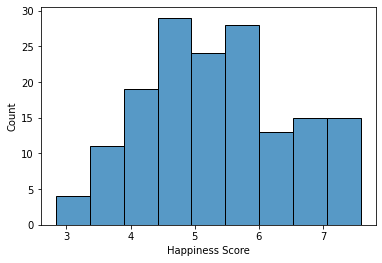

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(data=data,x='Happiness Score')

### Bivariate Analysis :-

##### Visual representation of each feature column with target column :

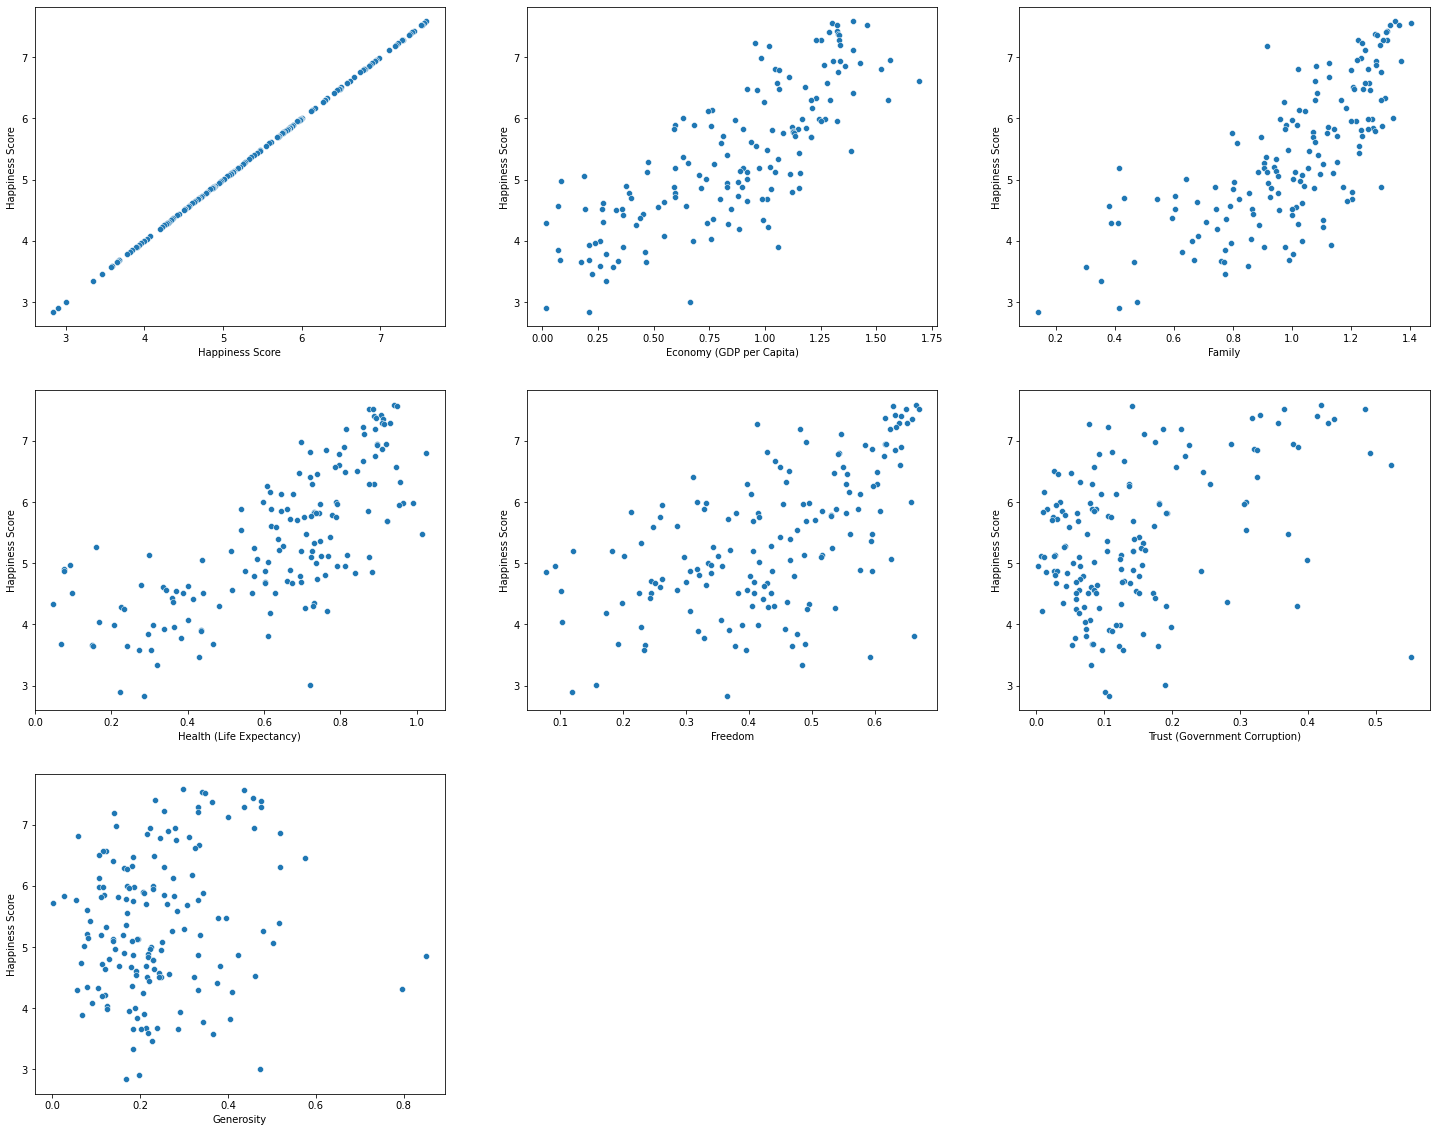

In [13]:
plt.figure(figsize=(25,20))
plotnumber=1
for i in data:
    if plotnumber<=7:
        plt.subplot(3,3,plotnumber)
        sns.scatterplot(x=data[i],y=data['Happiness Score'])
    plotnumber+=1
plt.show()

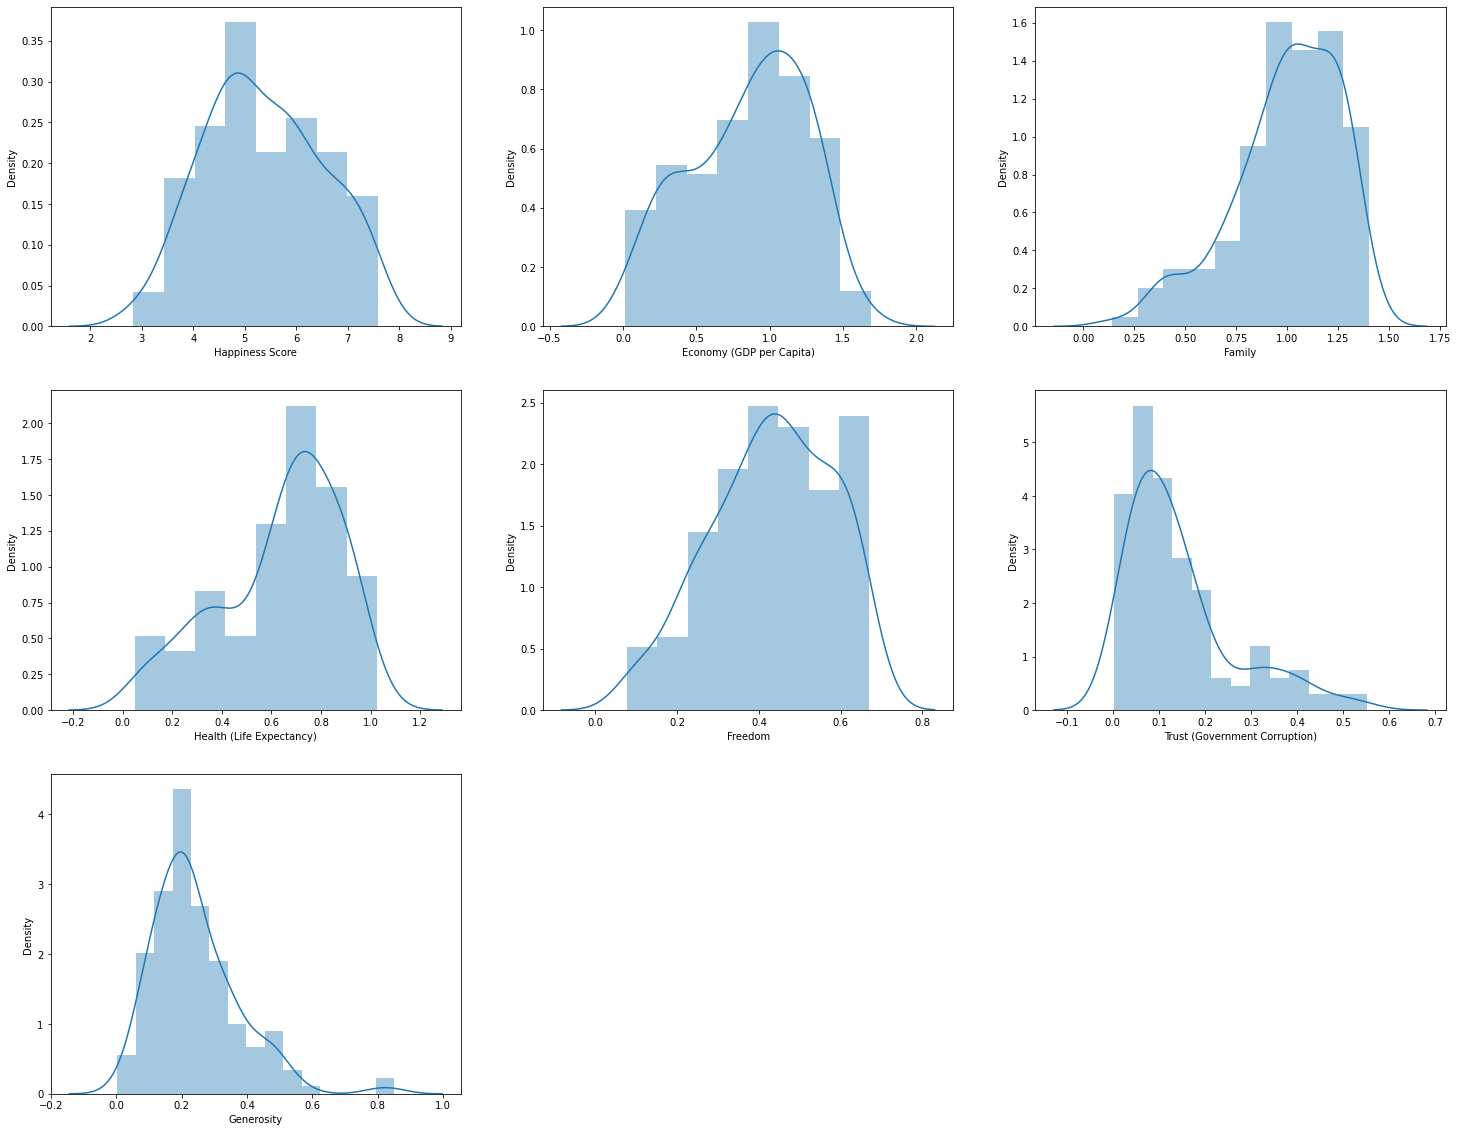

In [14]:
plt.figure(figsize=(25,20))
plotnumber=1
for i in data:
    if plotnumber<=7:
        plt.subplot(3,3,plotnumber)
        sns.distplot(x=data[i])
        plt.xlabel(i)
    plotnumber+=1
plt.show()

### Box-plot :

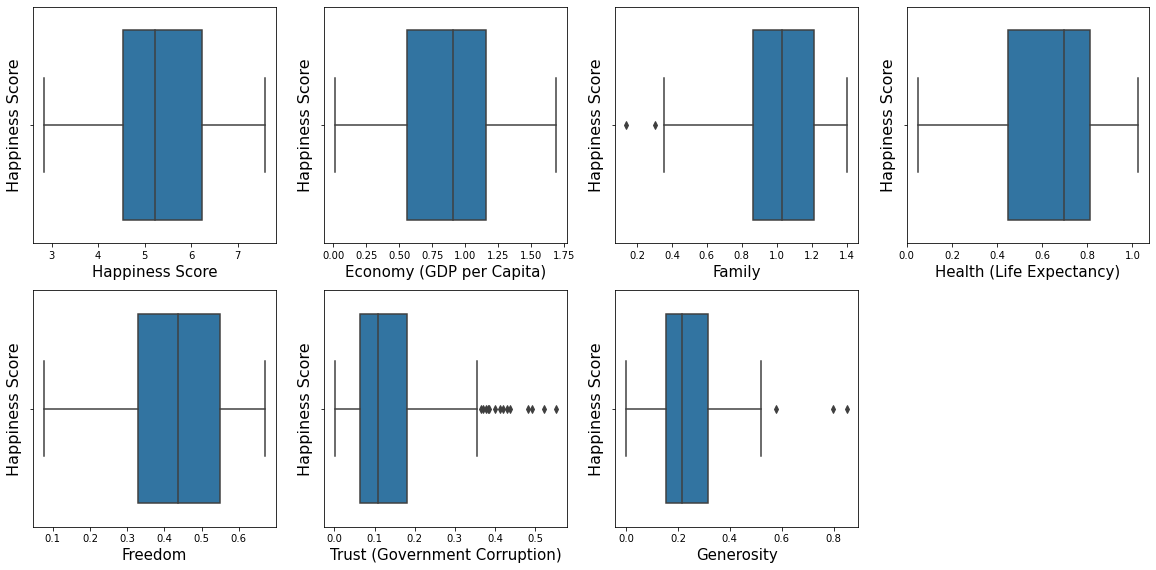

In [15]:
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
for i in data:
    if plotnumber<=20:
        ax=plt.subplot(4,4,plotnumber)
        sns.boxplot(data[i],orient='vericle')
        plt.xlabel(i,fontsize=15)
        plt.ylabel('Happiness Score',fontsize=16)
    plotnumber+=1
plt.show()

## Multi-variate Analysis :

<AxesSubplot:>

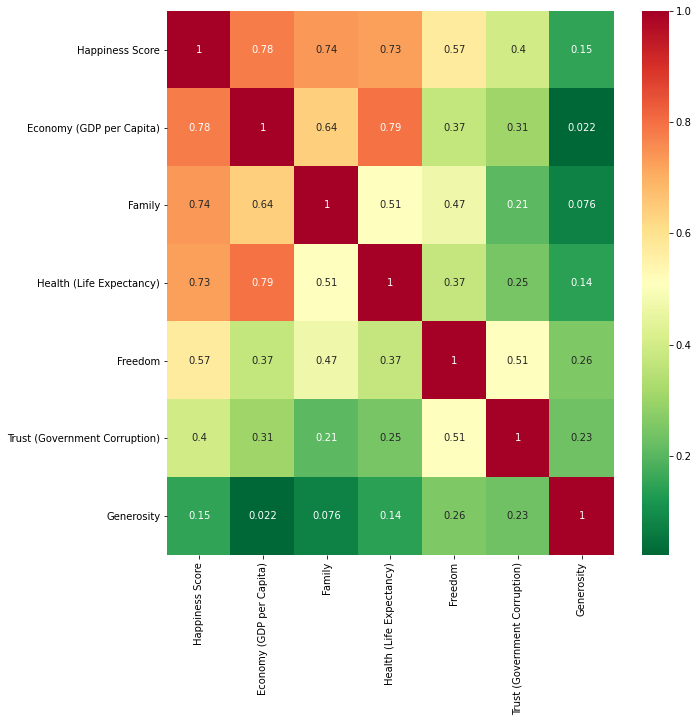

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn_r')

### Power Transformation:

In [17]:
applying_all=['Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Generosity']
from sklearn.preprocessing import PowerTransformer
scaler=PowerTransformer(method='box-cox')
data[applying_all]=scaler.fit_transform(data[applying_all].values)

In [18]:
data[applying_all].describe()

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
count,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02
mean,-3.752273e-16,1.770735e-16,-2.023698e-16,-5.677596e-16,7.331512e-16,2.740424e-16
std,1.003180e+00,1.003180e+00,1.003180e+00,1.003180e+00,1.003180e+00,1.003180e+00
min,-2.124354e+00,-2.234362e+00,-2.032697e+00,-2.192714e+00,-2.837712e+00,-3.532832e+00
25%,-7.392365e-01,-6.829769e-01,-8.750448e-01,-7.349744e-01,-6.117725e-01,-5.949340e-01
50%,1.508474e-01,-3.616543e-03,1.891729e-01,-1.514481e-02,-2.683588e-02,-4.484575e-02
75%,7.749000e-01,8.818577e-01,7.387229e-01,8.048943e-01,5.825080e-01,6.729233e-01
max,2.108012e+00,1.929381e+00,1.858603e+00,1.721569e+00,2.239025e+00,3.230378e+00


#### Checking Data again:

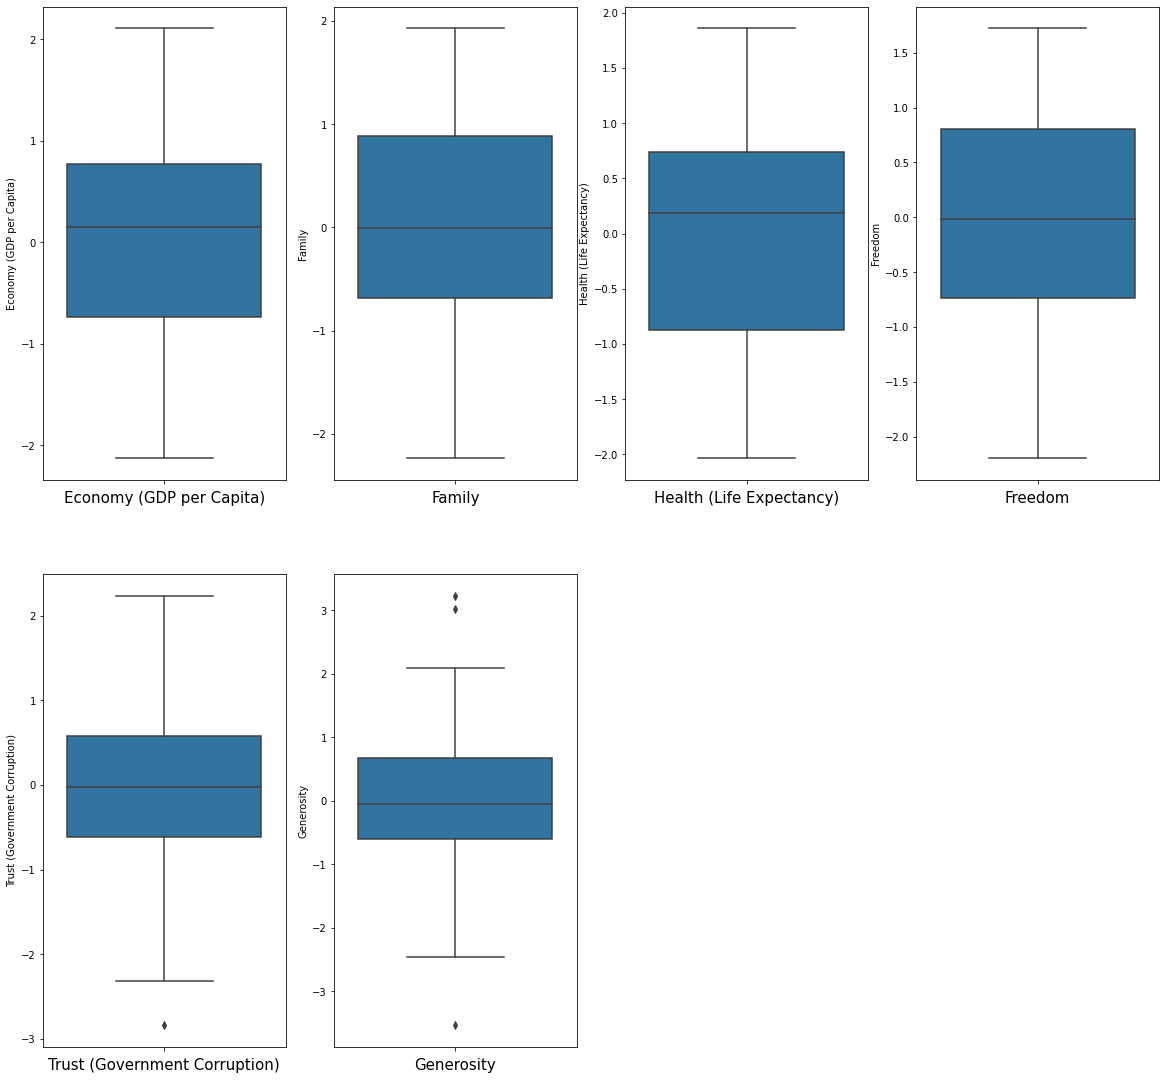

In [19]:
plt.figure(figsize=(20,40),facecolor='white')
plotnumber=1
for i in data[applying_all]:
    if plotnumber<=20:
        ax=plt.subplot(4,4,plotnumber)
        sns.boxplot(y=data[applying_all][i])
        plt.xlabel(i,fontsize=15)
        
    plotnumber+=1
plt.show()

In [20]:
data[applying_all].shape

(158, 6)

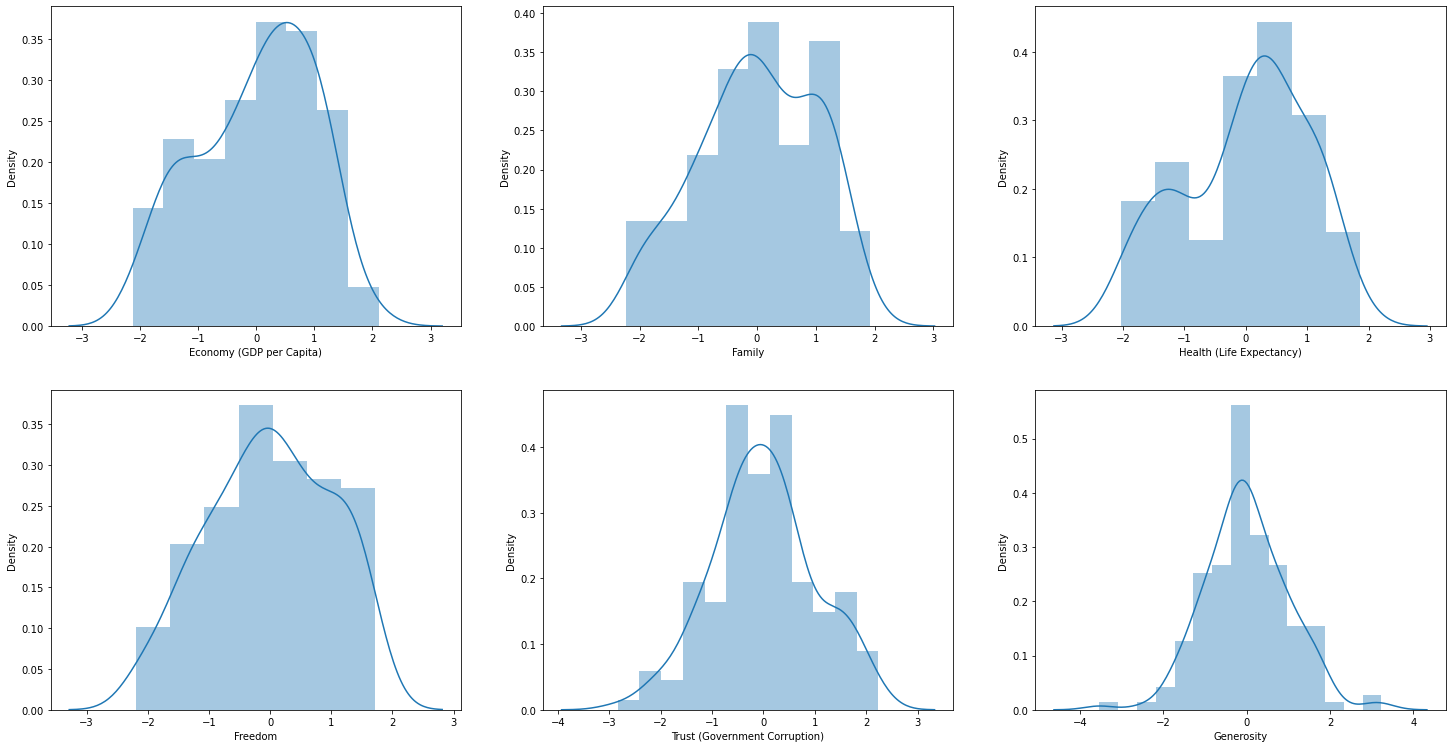

In [21]:
plt.figure(figsize=(25,20))
plotnumber=1
for i in data[applying_all]:
    if plotnumber<=7:
        plt.subplot(3,3,plotnumber)
        sns.distplot(x=data[applying_all][i])
        plt.xlabel(i)
    plotnumber+=1
plt.show()

####  Seperating target column from rest of the dataset :-

In [22]:
x=data[applying_all]
y=data['Happiness Score']

## Data Rescaling (Standardization of Data) :

In [23]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
x_scaled=scalar.fit_transform(x)

# models :

In [24]:
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
max_r2_score=0  
max_random_State=0
for i in range(1,300):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=i)
    reg=LinearRegression()
    reg.fit(x_train,y_train)
    y_pred=reg.predict(x_test)
    r2_scored=r2_score(y_test,y_pred)
    if r2_scored>max_r2_score:
        max_random_State=i
print(mean_squared_error(y_test,y_pred))
print(r2_scored)
print(max_random_State)

0.3504281685234155
0.7152166672338791
299


In [25]:
reg.score(x_train,y_train)


0.8069864818681527

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=250)
reg1=LinearRegression()
reg1.fit(x_train,y_train)
y_pred=reg1.predict(x_test)
r2_scored=r2_score(y_test,y_pred)
   
print(mean_squared_error(y_test,y_pred))
print(r2_scored)

0.3127065629878974
0.7248073247942093


In [27]:
reg1.score(x_train,y_train)

0.7983900451884859

In [28]:
from sklearn.tree import DecisionTreeRegressor
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=30)
reg2=DecisionTreeRegressor()
reg2.fit(x_train,y_train)
y_pred=reg2.predict(x_test)
r2_scored=r2_score(y_test,y_pred)

In [29]:
print(mean_squared_error(y_test,y_pred))
print(r2_scored)

0.7835201249999999
0.4917993948478163


In [30]:
from sklearn.svm import SVR
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=30)
reg3=SVR()
reg3.fit(x_train,y_train)
y_pred=reg3.predict(x_test)
r2_scored=r2_score(y_test,y_pred)
print(mean_squared_error(y_test,y_pred))
print(r2_scored)

0.4577476775226149
0.7191708948866895


In [31]:
from sklearn.ensemble import AdaBoostRegressor
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=30)
reg4=AdaBoostRegressor()
reg4.fit(x_train,y_train)
y_pred=reg4.predict(x_test)
r2_scored=r2_score(y_test,y_pred)
print(mean_squared_error(y_test,y_pred))
print(r2_scored)

0.42584163526592356
0.7387453148884413


In [32]:
from sklearn.ensemble import GradientBoostingRegressor
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=30)
reg5=GradientBoostingRegressor()
reg5.fit(x_train,y_train)
y_pred=reg5.predict(x_test)
r2_scored=r2_score(y_test,y_pred)
print(mean_squared_error(y_test,y_pred))
print(r2_scored)

0.429277788352322
0.7366372281767661


In [33]:
model=[reg1,reg2,reg3,reg4,reg5]
for m in model:
    m.fit(x_train,y_train)
    acc=m.score(x_train,y_train)
    predm=m.predict(x_test)
    r2 = r2_score(y_test, predm)
    print('----------',m,'-----------')
    print('Accuracy:',acc)
    print('mean square error:',mean_squared_error(predm,y_test))
    print('r2_score :',r2)
    print('\n')

---------- LinearRegression() -----------
Accuracy: 0.7767372802467067
mean square error: 0.3212608281377075
r2_score : 0.8029058468146653


---------- DecisionTreeRegressor() -----------
Accuracy: 1.0
mean square error: 0.8565128499999999
r2_score : 0.4745276732252397


---------- SVR() -----------
Accuracy: 0.8445737738361438
mean square error: 0.4577476775226149
r2_score : 0.7191708948866895


---------- AdaBoostRegressor() -----------
Accuracy: 0.8886999988426025
mean square error: 0.41008940675712485
r2_score : 0.7484093382202642


---------- GradientBoostingRegressor() -----------
Accuracy: 0.9831670826494678
mean square error: 0.4258661590859349
r2_score : 0.7387302694763815




### Cross-Validation Score :

In [34]:
m=[reg1,reg2,reg3,reg4,reg5]
for i in m:
    print('\n',i,'\n')
    scr_=cross_val_score(i,x,y,cv=5)
    print(scr_.mean())



 LinearRegression() 

-5.692926634128993

 DecisionTreeRegressor() 

-16.277395666297803

 SVR() 

-9.715728478374505

 AdaBoostRegressor() 

-9.473183261272109

 GradientBoostingRegressor() 

-9.371542920715456


## Hyperparameter tuning:

In [35]:
from sklearn.model_selection import GridSearchCV
parameters={'criterion':['mse','friedman_mse','mae','poisson'],
           'max_depth':[0.4,0.9,1],
           'max_features':['auto','sqrt','log2'],
           'random_state':[50,133,150]}

In [36]:
clf=GridSearchCV(DecisionTreeRegressor(),parameters)
clf.fit(x_train,y_train)
clf.best_params_

{'criterion': 'mse',
 'max_depth': 1,
 'max_features': 'auto',
 'random_state': 50}

In [37]:
d_new=clf.best_estimator_
d_new.fit(x_train,y_train)
acc__=d_new.score(x_train,y_train)
pred=d_new.predict(x_test)
print('Accuracy:',acc__)
print('mean square error:',mean_squared_error(pred,y_test))

Accuracy: 0.5025197104675434
mean square error: 1.2929805679312725


## Saving : 

In [38]:
import pickle
filename='World_Happiness_project.pkl'
pickle.dump(d_new,open(filename,'wb'))